
1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

<h3>Objective: To classify weather a patient can survive cancer treatment or not.</h3>

<strong> Exercise 1: </strong> Download and read Haberman Cancer Survival dataset from Kaggle

In [1]:
# importing libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read haberman cancer survival dataset to hcs_data

hcs_data = pd.read_csv('haberman.csv')
hcs_data
# print(hcs_data.head())
# print(hcs_data.tail())

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


<strong> Exercise 2: </strong> Perform Analysis i.e Exercise 3 to 7

<strong>Exercise 3: </strong> High level statistics of the dataset 

In [3]:
#High level statistics of the dataset: 
#     number of points, numer of features, number of classes, data-points per class.

print(hcs_data.shape)
print(hcs_data.columns)
hcs_data["status"].value_counts()

(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


1    225
2     81
Name: status, dtype: int64

<h4>Observation:</h4>
    1. There are 306 Data points in data set.
    2. There are 4 columns or features. 3 features(age','year','nodes') are independent variable 
       and 1 feature ('status') is dependent variable.
    3. There are 2 classes i.e 1 and 2
    4. Class '1' contains 225 datapoints and Class '2' contains 81 datapoints.
       Therefore dataset is unbalanced dataset.

<h4>Understanding dataset /  Domain Analysis of dataset</h4>
    1. 'age' : The age of patient at the time of operation.
    2. 'year' : The year of performing operation or treatment
    3. 'node' : The number of auxilary nodes
    4. 'status' : did the patient survived 5+ years or not.
                  '1' -> The patient survived 5 years or longer
                  '2' -> The patient didn't survive for 5 years 


<strong>Exercise 4: </strong> Explain our objective.

    Our objective is to classify, if the patient can survive for 5 years or more after treatment, 
    based on age, year of operation and number of cancer affected nodes.

<strong>Exercise 5: </strong> Perform Univaraite analysis (PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.

In [4]:
survived_df  = hcs_data.loc[hcs_data["status"]==1]
nsurvived_df  = hcs_data.loc[hcs_data["status"]==2]

<h2>Univariate Analysis using 'age'</h2>

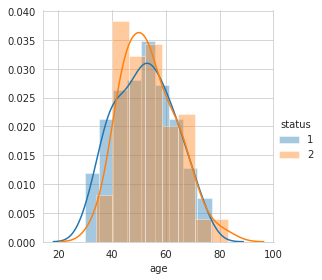

In [5]:
#Univariate Analysis of 'age'

sns.set_style("whitegrid")
sns.FacetGrid(hcs_data, hue="status", height=4) \
    .map(sns.distplot,"age") \
    .add_legend()
plt.show()

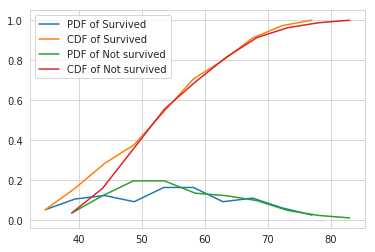

In [10]:
# Survived
counts, bin_edges = np.histogram(survived_df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of Survived')
plt.plot(bin_edges[1:], cdf, label='CDF of Survived')

#Not Survived
counts, bin_edges = np.histogram(nsurvived_df['age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Not survived')
plt.plot(bin_edges[1:], cdf,label='CDF of Not survived')
plt.legend()
plt.show()

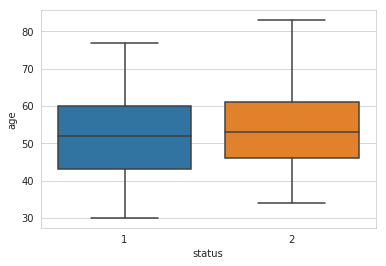

In [19]:
sns.boxplot(data=hcs_data, x="status", y="age")
plt.show()

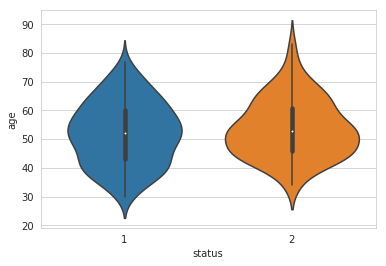

In [20]:
sns.violinplot(data=hcs_data, x="status", y="age")
plt.show()

<h2>Univariate Analysis using 'year'</h2>

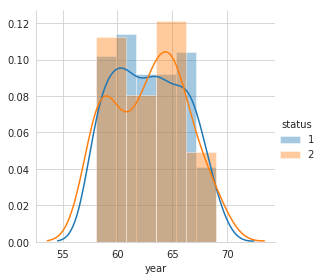

In [11]:
#Univariate Analysis of 'year'

sns.set_style("whitegrid")
sns.FacetGrid(hcs_data, hue="status", height=4) \
    .map(sns.distplot,"year") \
    .add_legend()
plt.show()

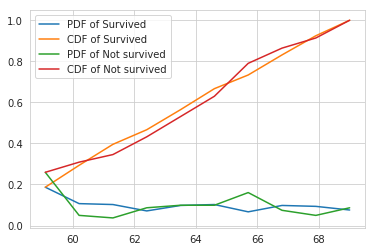

In [12]:
# Survived
counts, bin_edges = np.histogram(survived_df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of Survived')
plt.plot(bin_edges[1:], cdf, label='CDF of Survived')

#Not Survived
counts, bin_edges = np.histogram(nsurvived_df['year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Not survived')
plt.plot(bin_edges[1:], cdf,label='CDF of Not survived')
plt.legend()
plt.show()

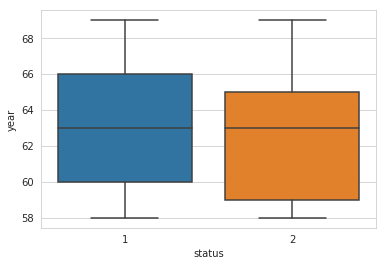

In [21]:
sns.boxplot(data=hcs_data, x="status", y="year")
plt.show()

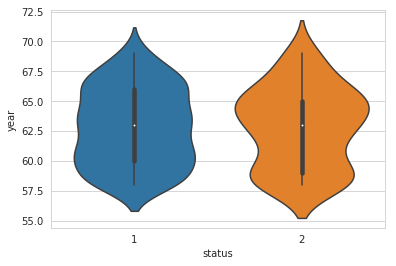

In [22]:
sns.violinplot(data=hcs_data, x="status", y="year")
plt.show()

<h2>Univariate Analysis using 'nodes'</h2>

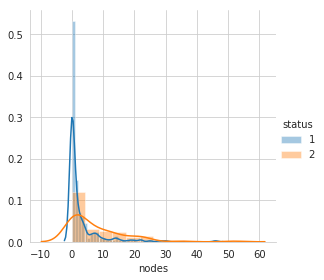

In [24]:
#Univariate Analysis of 'nodes'

sns.set_style("whitegrid")
sns.FacetGrid(hcs_data, hue="status", height=4) \
    .map(sns.distplot,"nodes") \
    .add_legend()
plt.show()

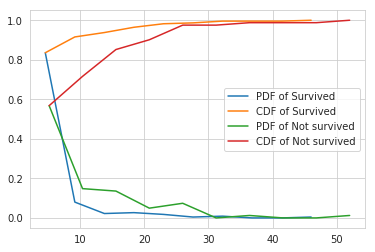

In [15]:
# Survived
counts, bin_edges = np.histogram(survived_df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of Survived')
plt.plot(bin_edges[1:], cdf, label='CDF of Survived')

#Not Survived
counts, bin_edges = np.histogram(nsurvived_df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF of Not survived')
plt.plot(bin_edges[1:], cdf,label='CDF of Not survived')
plt.legend()
plt.show()

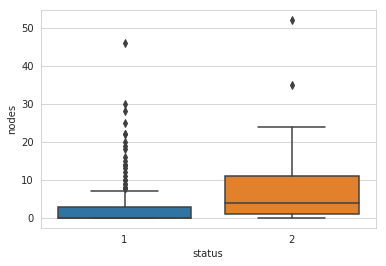

In [28]:
sns.boxplot(data=hcs_data, x="status", y="nodes")
plt.show()

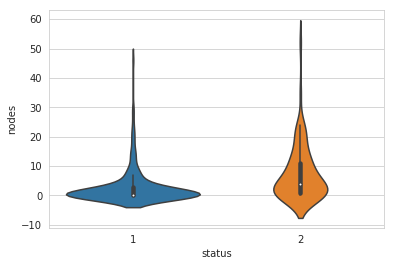

In [42]:
sns.violinplot(data=hcs_data, x="status", y="nodes")
plt.show()

<h4>Observation From Univariate Analysis:</h4>

       1. By observing above graphs for each feature we can determine that 'nodes' is most important feature
       PDF,CDF of age and year are highly overlapping, therefore they may not useful.
       So, impotant features: 'nodes' >> 'age' >slight 'year'
       2. We can clearly note that most points lies between 0 & 8 from boxplot('nodes') of survived patient 
       and more than 50% points lies between 0 and 5

<strong>Exercise 6: </strong> Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.

    The 'nodes' seems to be most important feature and 'age' is slightly better than 'year'
    So we can perform 2D Scatter plot of 'nodes' and 'age'

<h2>2D Scatter Plot of 'nodes', 'age'</h2>

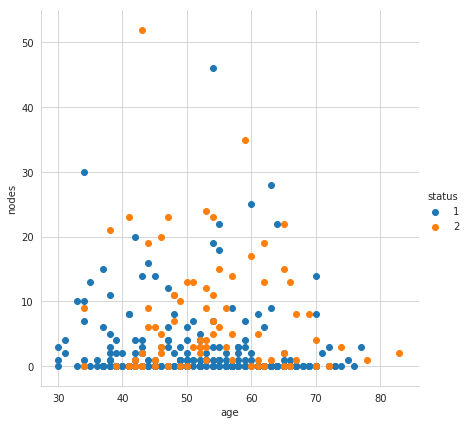

In [41]:
sns.set_style("whitegrid")
sns.FacetGrid(hcs_data, hue="status", height=6) \
    .map(plt.scatter,"age","nodes") \
    .add_legend()
plt.show()

<h4>Observations</h4>

    1. The Scatter plot of (nodes, age) is dense, so its does not seems to be useful

<h2>Pair plot of dataset</h2>

/home/d2c/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


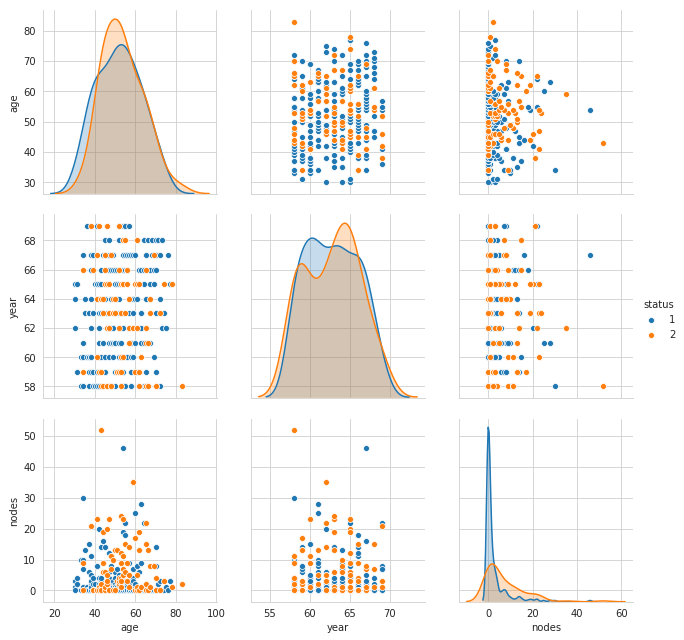

In [46]:
sns.set_style("whitegrid")
sns.pairplot(hcs_data, hue="status", vars=['age','year','nodes'] , size=3)
plt.show()

<h4>Observations</h4>

    1. Pair plot of the dataset doesn't seems to be useful

<h4>Conclusions</h4>

    1. The only analysis from all above can be made from box-plot, where we can note that most number of survived patients had nodes less than 8 and more than 75% people had nodes less than 5. So , chance of surving more than 5 years after operation is more if number of nodes are less than 5.